# Homework 9. Shadrin Mikhail

## Task 1

Open `dollar.dta` file

Dependent variable: `dollar`

Independent variable: `time`


### Use quadratic model to describe the change in the dollar exchange rate over the considered period


In [1]:
import pandas as pd
pd.set_option('display.max_columns', None)

data = pd.read_stata("data/dollar.dta")
data

,dollar,date,time
0,32.6587,01.01.2014,1.0
1,33.1547,10.01.2014,2.0
2,33.2062,11.01.2014,3.0
3,33.1204,14.01.2014,4.0
4,33.2386,15.01.2014,5.0
...,...,...,...
278,63.5083,25.02.2015,279.0
279,62.5906,26.02.2015,280.0
280,60.7109,27.02.2015,281.0
281,61.2718,28.02.2015,282.0


In [2]:
import pyreadstat
meta = pyreadstat.read_dta('data/dollar.dta')[1]
meta_df = pd.DataFrame(meta.column_names_to_labels.items(), columns=['Variable', 'Description']).set_index('Variable')

dtypes_df = pd.DataFrame({'Variable' : data.dtypes.index, 'Type' : data.dtypes.values}).set_index('Variable')

is_nan_df =  pd.DataFrame({'Variable' : data.dtypes.index, 'NaN count' : [data[column].isna().sum() for column in data]}).set_index('Variable')

pd.set_option('display.max_rows', None)
var_stat_df = meta_df.join(dtypes_df).join(is_nan_df)
var_stat_df

,Description,Type,NaN count
Variable,,,
dollar,dollar exchange rate,float64,0
date,date,object,0
time,None,float64,0


In [3]:
import numpy as np
import statsmodels.formula.api as sm

quadratic_formula = "dollar ~ time + np.power(time, 2)"

model_data = data.copy().drop(columns = ["date"])
model = sm.ols(formula = quadratic_formula, data = model_data)
fitted = model.fit()
print(fitted.summary())

                            OLS Regression Results                            
Dep. Variable:                 dollar   R-squared:                       0.919
Model:                            OLS   Adj. R-squared:                  0.919
Method:                 Least Squares   F-statistic:                     1594.
Date:                Thu, 23 Apr 2020   Prob (F-statistic):          1.00e-153
Time:                        11:55:08   Log-Likelihood:                -713.96
No. Observations:                 283   AIC:                             1434.
Df Residuals:                     280   BIC:                             1445.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            38.9605      0.54

In [4]:
params = fitted.params.copy()

print("Result regression equation for dollar:\ndollar = {:.4f} + {:.4f} * time + {:.4f} * time ^ 2"
      .format(params[0], params[1], params[2]))

print("R^2 = {:.4f}. The current model explains {:.4f}% of changes for dollar price"
      .format(fitted.rsquared, fitted.rsquared * 100))
print("The model is statistically significant" if fitted.f_pvalue < 0.05 else "The model is not statistically significant")


Result regression equation for dollar:
dollar = 38.9605 + -0.1484 * time + 0.0009 * time ^ 2
R^2 = 0.9192. The current model explains 91.9248% of changes for dollar price
The model is statistically significant


___

### Describe parameters of the regression model. 


In [6]:
from IPython.display import display

def is_significant(p_value, level):
    if abs(p_value) < level:
        return 'Yes'
    else:
        return 'No'
    
def find_significant_coefficients(coefs, p_values):
    merged = pd.DataFrame({'Coefficient' : coefs, 'P-value' : p_values})
    merged['Is Significant at 1%?'] = merged['P-value'].apply(lambda x: is_significant(x, 0.01))
    merged['Is Significant at 5%?'] = merged['P-value'].apply(lambda x: is_significant(x, 0.05))
    merged['Is Significant at 10%?'] = merged['P-value'].apply(lambda x: is_significant(x, 0.1))
    return merged
    
columns_names = params.index.tolist()

p_values =  fitted.pvalues.copy()
p_values.columns = columns_names

params.columns = columns_names

pd.set_option('display.max_rows', None)

custcat_with_significance = find_significant_coefficients(params, p_values)
display(custcat_with_significance)

,Coefficient,P-value,Is Significant at 1%?,Is Significant at 5%?,Is Significant at 10%?
Intercept,38.960516,5.876240e-182,Yes,Yes,Yes
time,-0.148388,3.880287e-44,Yes,Yes,Yes
"np.power(time, 2)",0.000896,2.084912e-88,Yes,Yes,Yes


All variables are significant at 0.01 level of significance
___

### Do the diagnostics of the model

In [7]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
plt.scatter(x=data.time, y=data.dollar)
plt.plot(data.time, params[0] + params[1] * data.time + params[2] * np.power(data.time, 2))
plt.xlabel('time')
plt.ylabel('dollar')
plt.show()

<Figure size 1000x800 with 1 Axes>

It is clearly seen that increasing the time also increases dollar's exchange rate. Since quadratic model sometimes fails to describe exchange rate, as it can be seen from the plot. I suggest that model like:

$dollar ~ O1 + O2 * time + O3 * time ^ 2 + O4 * time ^ 3 + O5 * time ^ 4$

wiill better suite this dataset and would be able to describe behaviour in exchange rate more precisely

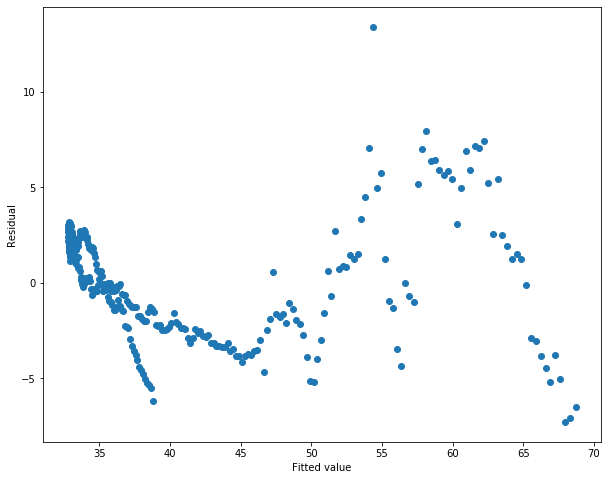

In [8]:
plt.figure(figsize=(10, 8))
plt.scatter(x=fitted.fittedvalues, y=fitted.resid)
plt.xlabel('Fitted value')
plt.ylabel('Residual')
plt.show()

This plot shows some relationship between residuals and fitted values, so we can say about heteroscedasticity of the model
___

## Task 2

Open `datafile.dta` file

There are data from 2007 to 2016 on 96 federal executive bodies. The task is to identify the relationship between the level of remuneration of civil servants and various factors.

Dependent variable: Average monthly salary (`salary`)

Independent Variables:
* Number of civil servants (`v1`)
* Number of vacant positions (`v2`)
* Number of civil servants with higher education (`v3`)
* Number of civil servants with 2 or more higher education (`v4`)
* The number of civil servants who received an additional education (`v5`)
* Number of male civil servants (`v6`)
* Number of female civil servants (`v7`)
* Number of civil servants of retirement age (`v8`)
* The number of civil servants whose work experience is less than 10 years (`v9`)
* The number of civil servants whose work experience is from 10 to 25 years (`v10`)
* The number of civil servants whose work experience is 25 years or more (`v11`)

Tasks:
1. Select at least 7 independent variables (you can select more or all).
2. Conduct tests to select one of three models: pulled regression model, a model with fixed effects, and a model with random effects. Choose the right model and justify your choice.
3. Describe the resulting model as a whole.
4. Describe the relationships between the dependent variable and the predictors (which relationships are significant, which are direct, which are inverse). Draw conclusions from the analysis.
5. Save the individual effects as a separate variable and indicate the names of the federal executive bodies with the greatest and least individual effect.



In [72]:
pd.set_option('display.max_rows', 10)
raw_data = pd.read_stata("data/datafile.dta")
raw_data

,id,name,year,t,salary,v1,v2,v3,v4,v5,v6,v7,v8,v9,v10,v11
0,4,МИД России,2016,10,147239,3233,93.131687,2812,163,1966,1908,1345,454,1296,1442,515
1,4,МИД России,2012,6,60376,3128,147.392670,0,0,1356,0,0,0,0,0,0
2,4,МИД России,2011,5,59501,3144,134.415016,0,0,1407,0,0,0,0,0,0
3,4,МИД России,2009,3,52536,3192,85.207392,2552,298,1064,1866,1343,322,1432,1311,466
4,4,МИД России,2014,8,114092,3190,136.381648,0,0,1435,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
955,1,Аппарат Правительства РФ,2011,5,102081,1291,161.193476,0,0,165,0,0,0,0,0,0
956,1,Аппарат Правительства РФ,2008,2,83814,1257,281.555692,0,0,218,0,0,0,0,0,0
957,1,Аппарат Правительства РФ,2009,3,108090,1281,247.639618,1176,297,330,644,661,196,360,527,418
958,1,Аппарат Правительства РФ,2016,10,228475,1412,132.857768,1375,394,219,692,723,221,420,594,401


In [73]:
meta = pyreadstat.read_dta('data/datafile.dta')[1]
meta_df = pd.DataFrame(meta.column_names_to_labels.items(), columns=['Variable', 'Description']).set_index('Variable')

dtypes_df = pd.DataFrame({'Variable' : data.dtypes.index, 'Type' : data.dtypes.values}).set_index('Variable')

is_nan_df =  pd.DataFrame({'Variable' : data.dtypes.index, 'NaN count' : [data[column].isna().sum() for column in data]}).set_index('Variable')

pd.set_option('display.max_rows', None)
var_stat_df = meta_df.join(dtypes_df).join(is_nan_df)
var_stat_df

,Description,Type,NaN count
Variable,,,
id,id,NaN,NaN
name,Name of the Federal Executive Body,NaN,NaN
year,year,NaN,NaN
t,year,NaN,NaN
salary,The average monthly salary of a public servant,int32,0.0
v1,Number of public servants,int16,0.0
v2,Number of Vacancies,float64,0.0
v3,Number of public servants with higher education,int16,0.0
v4,Number of public servants with two or more hig...,int16,0.0


In [74]:
pd.set_option('display.max_rows', 10)
data = raw_data.copy().drop(columns=["name", "t"]).set_index(['id', 'year'])
data

salary    v1          v2    v3   v4    v5    v6    v7   v8    v9  \
id year                                                                     
4  2016  147239  3233   93.131687  2812  163  1966  1908  1345  454  1296   
   2012   60376  3128  147.392670     0    0  1356     0     0    0     0   
   2011   59501  3144  134.415016     0    0  1407     0     0    0     0   
   2009   52536  3192   85.207392  2552  298  1064  1866  1343  322  1432   
   2014  114092  3190  136.381648     0    0  1435     0     0    0     0   
...         ...   ...         ...   ...  ...   ...   ...   ...  ...   ...   
1  2011  102081  1291  161.193476     0    0   165     0     0    0     0   
   2008   83814  1257  281.555692     0    0   218     0     0    0     0   
   2009  108090  1281  247.639618  1176  297   330   644   661  196   360   
   2016  228475  1412  132.857768  1375  394   219   692   723  221   420   
   2013  240788  1399  102.072961  1347  358   174   677   742  213   465   

          v10  v11  
id year             
4  2016  1442  515  
   2012     0    0  
   2011     0    0  
   2009  1311  466  
   2014     0    0  
...       ...  ...  
1  2011     0    0  
   2008     0    0  
   2009   527  418  
   2016   594  401  
   2013   561  393  

[960 rows x 12 columns]

___

### Select at least 7 independent variables (you can select more or all)

We select all variables for current models. Now we fit 3 models with all the variables

In [75]:
from statsmodels.api import add_constant
import linearmodels.panel as lm


exog = add_constant(data[data.columns.drop('salary')])
pooled_model = lm.PooledOLS(data.salary, exog)
pooled_fitted = pooled_model.fit()
pooled_fitted

Dep. Variable:,salary,R-squared:,0.3112
Estimator:,PooledOLS,R-squared (Between):,0.4209
No. Observations:,960,R-squared (Within):,0.2092
Date:,"Thu, Apr 23 2020",R-squared (Overall):,0.3112
Time:,13:43:00,Log-likelihood,-1.127e+04
Cov. Estimator:,Unadjusted,,
,,F-statistic:,38.935
Entities:,96,P-value,0.0000
Avg Obs:,10.0000,Distribution:,"F(11,948)"
Min Obs:,10.0000,,
Max Obs:,10.0000,F-statistic (robust):,38.935


In [76]:
fixed_model = lm.PanelOLS(data.salary, exog, entity_effects=True)
fixed_fitted = fixed_model.fit()
fixed_fitted

Dep. Variable:,salary,R-squared:,0.2597
Estimator:,PanelOLS,R-squared (Between):,0.0575
No. Observations:,960,R-squared (Within):,0.2597
Date:,"Thu, Apr 23 2020",R-squared (Overall):,0.1623
Time:,13:43:00,Log-likelihood,-1.098e+04
Cov. Estimator:,Unadjusted,,
,,F-statistic:,27.207
Entities:,96,P-value,0.0000
Avg Obs:,10.0000,Distribution:,"F(11,853)"
Min Obs:,10.0000,,
Max Obs:,10.0000,F-statistic (robust):,27.207


In [77]:
random_model = lm.RandomEffects(data.salary, exog)
random_fitted = random_model.fit()
random_fitted

Dep. Variable:,salary,R-squared:,0.2587
Estimator:,RandomEffects,R-squared (Between):,0.3310
No. Observations:,960,R-squared (Within):,0.2469
Date:,"Thu, Apr 23 2020",R-squared (Overall):,0.2874
Time:,13:43:01,Log-likelihood,-1.106e+04
Cov. Estimator:,Unadjusted,,
,,F-statistic:,30.080
Entities:,96,P-value,0.0000
Avg Obs:,10.0000,Distribution:,"F(11,948)"
Min Obs:,10.0000,,
Max Obs:,10.0000,F-statistic (robust):,30.080


In [78]:
lm.compare({'Pooled regression':pooled_fitted, 'Fixed effects':fixed_fitted, 'Random effects':random_fitted})

,Pooled regression,Fixed effects,Random effects
Dep. Variable,salary,salary,salary
Estimator,PooledOLS,PanelOLS,RandomEffects
No. Observations,960,960,960
Cov. Est.,Unadjusted,Unadjusted,Unadjusted
R-squared,0.3112,0.2597,0.2587
R-Squared (Within),0.2092,0.2597,0.2469
R-Squared (Between),0.4209,0.0575,0.3310
R-Squared (Overall),0.3112,0.1623,0.2874
F-statistic,38.935,27.207,30.080
P-value (F-stat),0.0000,0.0000,0.0000


___

### Conduct tests to select one of three models: pulled regression model, a model with fixed effects, and a model with random effects. Choose the right model and justify your choice

At first, let's consider which model to use: **pooled regrerssion model** or **fixed effects regression**?

Let's check this hypothesis:
* H0: all individual effects are the same and equal to zero (so we choose **pooled regression model**)
* H1: some individual effects are not equal to zero (so we choose **fixed effects regression**)

In [79]:
pooled_f_test = fixed_fitted.f_pooled
display(pooled_f_test)

if(pooled_f_test.pval < 0.05):
    print("Reject H0. Choose fixed effects regression")
else:
    print("Can not reject H0. Choose pooled regression model")

Pooled F-statistic
H0: Effects are zero
Statistic: 7.1403
P-value: 0.0000
Distributed: F(95,853)
WaldTestStatistic, id: 0x1f2d232d648

Reject H0. Choose fixed effects regression


Secondly, let's consider which model to use: **random effects regression** or **fixed effects regression**?

Let's check this hypothesis:
* H0: individual effects and regressors are not correlated (so we choose **random effects regression**)
* H1: individual effects and regressors are correlated (so we choose **fixed effects regression**)

In [80]:
import numpy as np
import numpy.linalg as la
from scipy import stats

# https://github.com/sglyon/econtools/blob/master/Python/econtools/metrics.py
def hausman(fe, re):
    b = fe.params
    B = re.params
    v_b = fe.cov
    v_B = re.cov

    df = b[np.abs(b) < 1e8].size

    chi2 = np.dot((b - B).T, la.inv(v_b - v_B).dot(b - B))
    pval = stats.chi2.sf(chi2, df)

    return chi2, df, pval

hausman_test = hausman(fixed_fitted, random_fitted)
display("Hausman test statistic: {}".format(hausman_test))

if(hausman_test[2] < 0.05):
    print("Reject H0. Choose fixed effects regression")
else:
    print("Can not reject H0. Choose random effects regression")

'Hausman test statistic: (71.57795252345772, 12, 1.6211881251920242e-10)'

Reject H0. Choose fixed effects regression


Since, now we see thar pooled regression model < fixed effects regression and random effects model < fixed effects regression. So we select **fixed effects regression** model

___

### Describe the resulting model as a whole

As it can be seen from the results of PanelOLS regression above, `R^2 (Overall)` value for this model = 0.1623, which means that this model describes 16.23% of observed cases.

___

### Describe the relationships between the dependent variable and the predictors (which relationships are significant, which are direct, which are inverse). Draw conclusions from the analysis

In [81]:
pd.set_option('display.max_rows', None)

params = fixed_fitted.params
p_values = fixed_fitted.pvalues
significant_coefs = find_significant_coefficients(params, p_values)
significant_coefs

,Coefficient,P-value,Is Significant at 1%?,Is Significant at 5%?,Is Significant at 10%?
const,28789.319803,0.000000e+00,Yes,Yes,Yes
v1,21.215661,7.345768e-06,Yes,Yes,Yes
v2,89.198788,3.286260e-14,Yes,Yes,Yes
v3,299.539683,4.486903e-06,Yes,Yes,Yes
v4,94.109427,6.019880e-02,No,No,Yes
v5,73.817731,3.900680e-11,Yes,Yes,Yes
v6,38.783898,8.244355e-01,No,No,No
v7,-46.876289,7.870810e-01,No,No,No
v8,254.389149,7.480257e-03,Yes,Yes,Yes
v9,-274.330070,1.368884e-01,No,No,No


In [82]:
significant_coefs = significant_coefs[significant_coefs["Is Significant at 5%?"] == "Yes"]
print("Variables significant at level of significance 0.05:\n")
significant_coefs

Variables significant at level of significance 0.05:



,Coefficient,P-value,Is Significant at 1%?,Is Significant at 5%?,Is Significant at 10%?
const,28789.319803,0.000000e+00,Yes,Yes,Yes
v1,21.215661,7.345768e-06,Yes,Yes,Yes
v2,89.198788,3.286260e-14,Yes,Yes,Yes
v3,299.539683,4.486903e-06,Yes,Yes,Yes
v5,73.817731,3.900680e-11,Yes,Yes,Yes
v8,254.389149,7.480257e-03,Yes,Yes,Yes
v11,-490.304906,1.309647e-02,No,Yes,Yes


As we can see from the table:
* Increase in number of public servants `v1` by one increases salary by 21.22
* Increase in number of vacancies `v2` by one increases salary  by 89.20
* Increase in number of public servants with higher education `v3` by one increases salary by 299.54
* Increase in number of public servants who passed special training `v5` by one increases salary by 73.82
* Increase in number of public servants who are who are at retirement age `v8` by one increases salary by 254.39
* Increase in number of public servants with woking experience more than 25 years `v11` by one decreases salary by 490.30

So we assume that the best way for earning higher salary in federal executive body is to get higher education and enroll special cources, work in crowded department with lots of employees, but to avoid deparments with extremely experienced coworkers concentration

___

### Save the individual effects as a separate variable and indicate the names of the federal executive bodies with the greatest and least individual effect

In [83]:
pd.set_option('display.max_rows', 10)
individual_effects = fixed_fitted.estimated_effects
individual_effects

estimated_effects
id year                   
4  2016     -125012.355969
   2012     -125012.355969
   2011     -125012.355969
   2009     -125012.355969
   2014     -125012.355969
...                    ...
1  2011       58096.555296
   2008       58096.555296
   2009       58096.555296
   2016       58096.555296
   2013       58096.555296

[960 rows x 1 columns]

In [96]:
least_individual_effect = individual_effects.idxmin()[0]
greatest_individual_effect = individual_effects.idxmax()[0]

least_individual_effect_fedexbody = raw_data[raw_data.id == least_individual_effect[0]]
greatest_individual_effect_fedexbody = raw_data[raw_data.id == greatest_individual_effect[0]]

print("Least individual effect had {} in {}"
      .format(least_individual_effect_fedexbody.iloc[0]["name"],
              least_individual_effect[1]))
print("Greatest individual effect had {} in {}"
      .format(greatest_individual_effect_fedexbody.iloc[0]["name"],
              greatest_individual_effect[1]))

Least individual effect had МИД России in 2016
Greatest individual effect had Аппарат Правительства РФ in 2014
